
# Analisis frecuencial y diseño de filtros fir pasabajos
*Ignacio Diaz Blanco, 2019. Universidad de Oviedo.*


## Descripcion 
En este ejemplo se cargan los datos de diversos ensayos realizados sobre un motor asincrono de 4 kW. Se analizan las variables $a_x(t)$, $a_y(t)$ de  acelerometros colocados en direcciones $x$ e $y$ del motor. Se describen los siguientes procedimientos: 

* Analisis frecuencial de las señales mediante FFT
* Diseño de un filtro FIR pasabajos
* Trazado de la respuesta en frecuencia del filtro FIR diseñado
* Filtrado de las señales mediante el filtro FIR
* Analisis frecuencial de la señal filtrada mediante FFT


In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.io.matlab import loadmat

%matplotlib inline

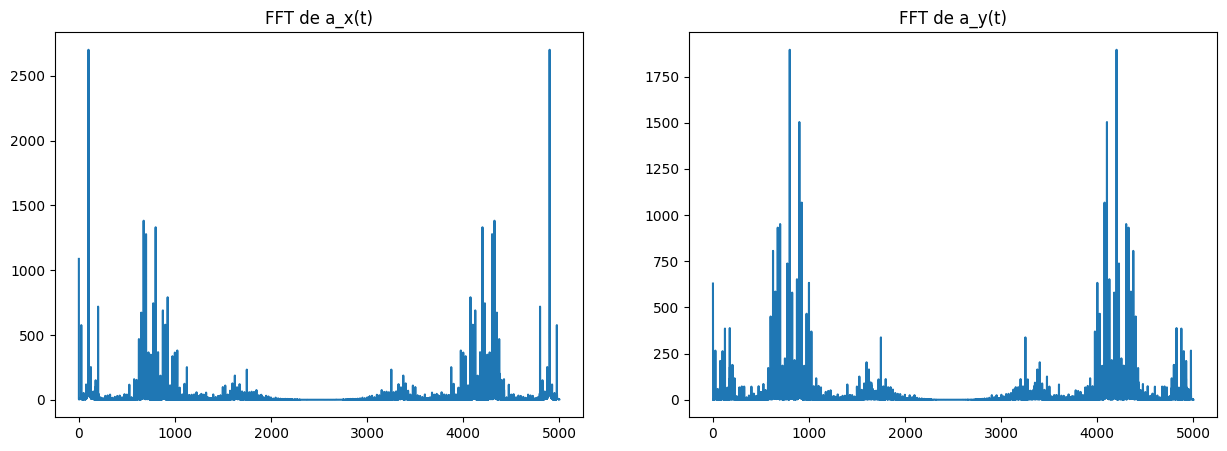

In [2]:
datos = loadmat('../../datos/dataicann.mat')
etiq_ensayos = datos['nom'][0][0][0]

# cargamos nombres de las variables
varNames = []
for i in range(5):
    varNames.append(datos['NombresVariables'][0][i][0])
    
# cargamos los datos de los ensayos
z = []
nom = []
for i in range(9):
    z.append(datos['z'][:,i][0]) 
    nom.append(datos['nom'][0][i][0])


# SELECCION DE UNO DE LOS REGISTROS PARA SU ANALISIS (EJ. FALLO ASIMETRIA)
Registro = 1;
ac = z[Registro][:,0]; 
ax = z[Registro][:,1]; 
ay = z[Registro][:,2];


# PARAMETROS VARIOS
N = len(ac);                # Tamaño de la secuencia de datos
fm = 5000;                  # Frecuencia de muestreo
tm = 1/fm;                  # Periodo de muestreo
f = np.arange(0,fm,fm/N);   # Vector de frecuencias ...
t = np.arange(0,tm*N,tm);   # Vector de tiempos

# ANALISIS MEDIANTE TRANSFORMADA DE FOURIER (FFT)
plt.figure(1,figsize=(15,5)); 

# Acelerometro a_x(t)
plt.subplot(1,2,1)
plt.plot(f,abs(np.fft.fft(ax)));     
plt.title('FFT de a_x(t)');

# Acelerometro a_y(t)
plt.subplot(1,2,2)
plt.plot(f,abs(np.fft.fft(ay)));     
plt.title('FFT de a_y(t)');

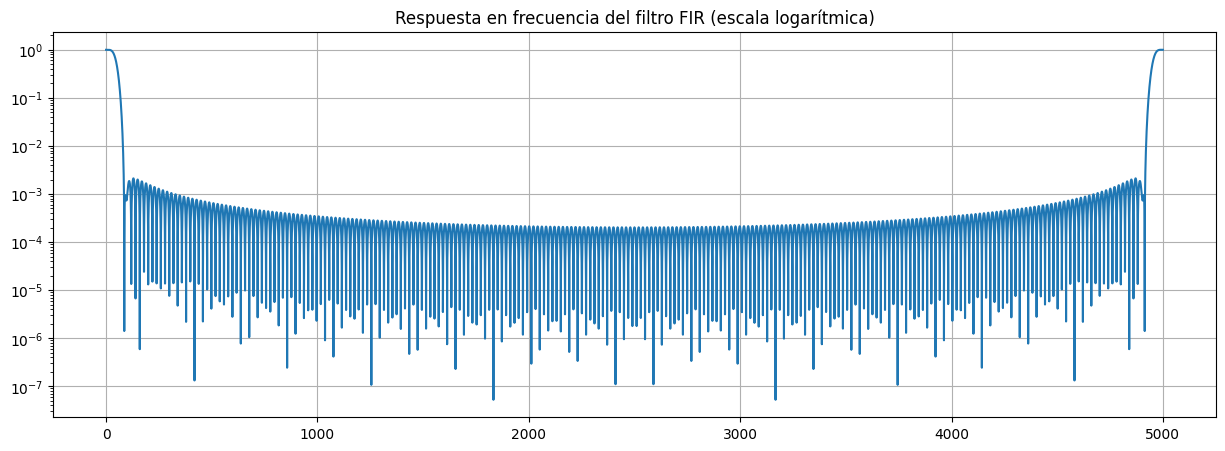

In [3]:
# DISEÑO DE UN FILTRO FIR PASABAJOS
# Obtencion de coeficientes del filtro 
fc = 50;                                     # Frecuencia de corte (Hz)
wc = fc/(fm/2);                              # Frecuencia de corte (normalizada 0=0, 1=frec_shannon)
b = sig.firwin(251,wc,window='hamming');     # Coeficientes del fir (defecto: ventana de Hamming)



# Trazado de la respuesta en frecuencia del filtro fir
plt.figure(2,figsize=(15,5)); 
plt.semilogy(f,abs(np.fft.fft(b,N)));  
plt.grid(True)
plt.title(u'Respuesta en frecuencia del filtro FIR (escala logarítmica)');

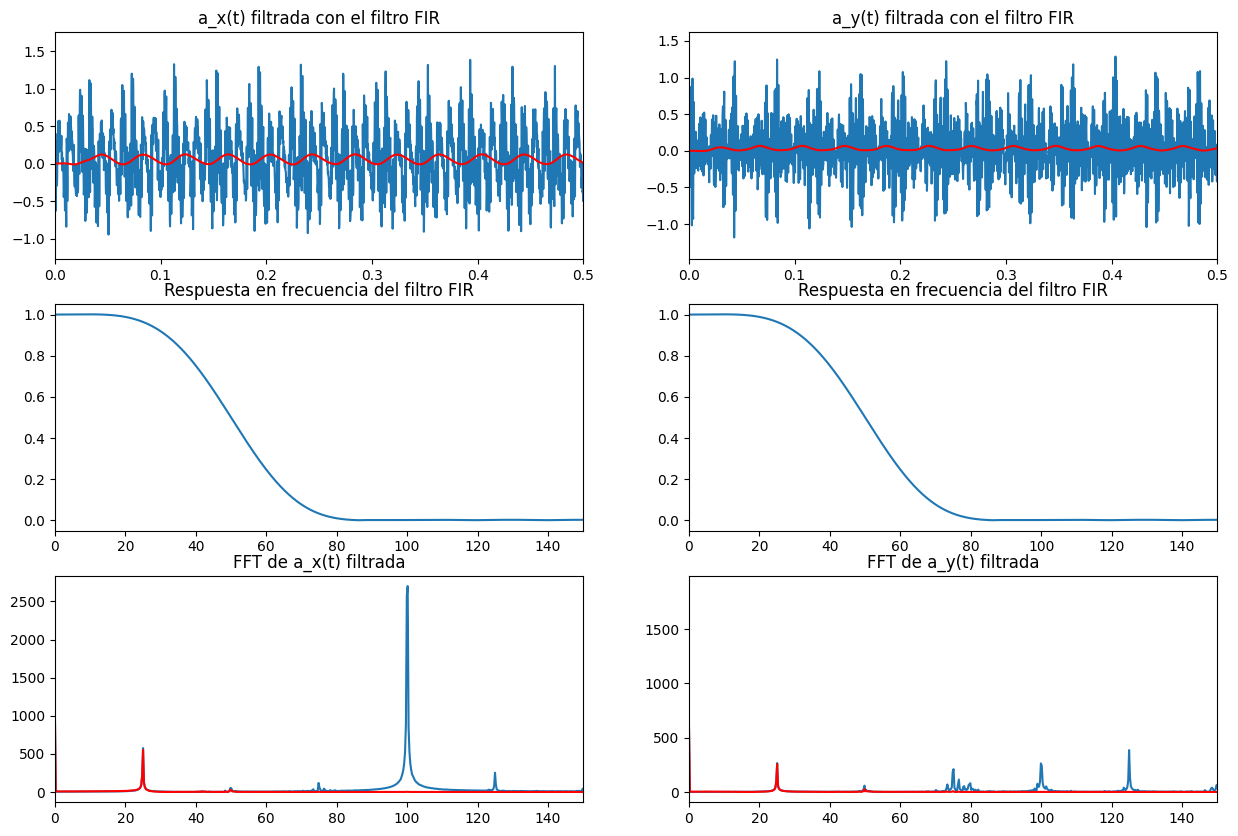

In [4]:
# FILTRADO DE LAS SEÑALES
axf = sig.lfilter(b,1,ax);
ayf = sig.lfilter(b,1,ay);



plt.figure(3,figsize=(15,10));
plt.subplot(3,2,1)
plt.plot(t,ax)
plt.plot(t,axf,color='r');        # Trazado grafico de la señal filtrada
plt.title('a_x(t) filtrada con el filtro FIR');
plt.axis(xmin=0,xmax=0.5)



plt.subplot(3,2,2); 
plt.plot(t,ay)
plt.plot(t,ayf,color='r');        # Trazado grafico de la señal filtrada
plt.title('a_y(t) filtrada con el filtro FIR');
plt.axis(xmin=0,xmax=0.5)



plt.subplot(3,2,3);
plt.plot(f,abs(np.fft.fft(b,N)));  
plt.title('Respuesta en frecuencia del filtro FIR');
plt.axis(xmin=0,xmax=150)


plt.subplot(3,2,4);
plt.plot(f,abs(np.fft.fft(b,N)));  
plt.title('Respuesta en frecuencia del filtro FIR');
plt.axis(xmin=0,xmax=150)


# FFT de las señales filtradas
plt.subplot(3,2,5);
plt.plot(f,abs(np.fft.fft(ax)))
plt.plot(f,abs(np.fft.fft(axf)),color='red');
plt.title('FFT de a_x(t) filtrada');
plt.axis(xmin=0,xmax=150)


plt.subplot(3,2,6);
plt.plot(f,abs(np.fft.fft(ay)))
plt.plot(f,abs(np.fft.fft(ayf)),color='red');
plt.title('FFT de a_y(t) filtrada');
plt.axis(xmin=0,xmax=150);

## Sonificación de la señal original y de la filtrada

In [5]:
import pyaudio
chunk = ax
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=5000, output=1, frames_per_buffer=1)
stream.write(chunk.astype(np.float32).tobytes())
stream.close()
p.terminate()

In [6]:
chunk = axf
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32, channels=1, rate=5000, output=1, frames_per_buffer=1)
stream.write(chunk.astype(np.float32).tobytes())
stream.close()
p.terminate()

In [7]:
%%html
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">"Analisis frecuencial y diseño de filtros fir pasabajos"</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.